I will be using Mean Square Error (MSE) to judge model performance

# Importing the libraries and input dataset

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import numpy as np

In [2]:
dataset = fetch_california_housing()

I will use total_records_removed to keep track of how many records we will remove from the model

In [3]:
total_records_removed=0

In [4]:
in_data=pd.DataFrame(dataset.data)
in_data.columns=dataset.feature_names
in_data["Value"]=pd.DataFrame(dataset.target)

In [5]:
in_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Check MedInc

          MedInc     Value
MedInc  1.000000  0.688075
Value   0.688075  1.000000
Skewness of MedInc is :  1.6466567021344465


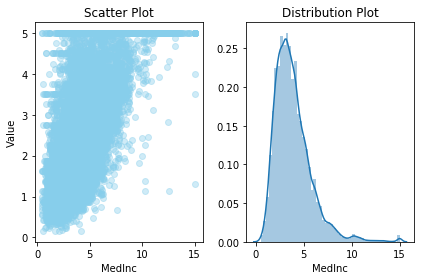

In [6]:
plt.subplot(1,2,1)
plt.scatter(x="MedInc",y="Value",data=in_data,alpha=0.4,c="skyblue")
plt.xlabel("MedInc")
plt.ylabel("Value")
plt.title("Scatter Plot")
plt.subplot(1,2,2)
sns.distplot(in_data["MedInc"])
plt.tight_layout()
plt.title("Distribution Plot")
print(in_data[["MedInc","Value"]].corr())
print("Skewness of MedInc is : ",in_data["MedInc"].skew())

# Check HouseAge

          HouseAge     Value
HouseAge  1.000000  0.105623
Value     0.105623  1.000000
Skewness of HouseAge is :  0.060330637599136865


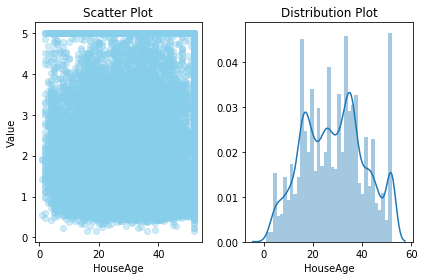

In [7]:
plt.subplot(1,2,1)
plt.scatter(x="HouseAge",y="Value",data=in_data,alpha=0.4,c="skyblue")
plt.xlabel("HouseAge")
plt.ylabel("Value")
plt.title("Scatter Plot")
plt.subplot(1,2,2)
sns.distplot(in_data["HouseAge"])
plt.tight_layout()
plt.title("Distribution Plot")
print(in_data[["HouseAge","Value"]].corr())
print("Skewness of HouseAge is : ",in_data["HouseAge"].skew())

# Check AveRooms

          AveRooms     Value
AveRooms  1.000000  0.151948
Value     0.151948  1.000000
Skewness of AveRooms is :  20.697868956710646


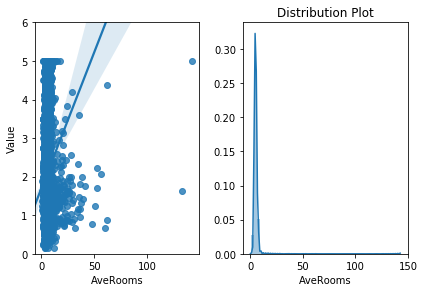

In [8]:
plt.subplot(1,2,1)
sns.regplot(data=in_data,x="AveRooms",y="Value")
plt.ylim(0,6)
plt.subplot(1,2,2)
sns.distplot(in_data["AveRooms"])
plt.tight_layout()
plt.title("Distribution Plot")
print(in_data[["AveRooms","Value"]].corr())
print("Skewness of AveRooms is : ",in_data["AveRooms"].skew())

We can see there are a few outliers in AveRooms, 
I will remove the outliers as the count is less than 1%

Below, I have removed records with AveRooms value > 40

In [9]:
upd_data=in_data.copy()
total_records_removed+=len(upd_data.loc[upd_data["AveRooms"]>40,])
upd_data=upd_data.loc[upd_data["AveRooms"]<=40,:]
print("Total records removed = ",total_records_removed)

Total records removed =  11


          AveRooms     Value
AveRooms  1.000000  0.199349
Value     0.199349  1.000000
Skewness of AveRooms is :  6.187598561253874


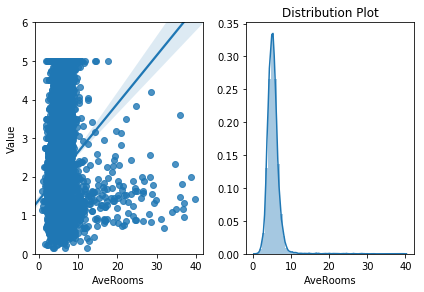

In [10]:
plt.subplot(1,2,1)
sns.regplot(data=upd_data,x="AveRooms",y="Value")
plt.ylim(0,6)
plt.subplot(1,2,2)
sns.distplot(upd_data["AveRooms"])
plt.tight_layout()
plt.title("Distribution Plot")
print(upd_data[["AveRooms","Value"]].corr())
print("Skewness of AveRooms is : ",upd_data["AveRooms"].skew())

Now the plot looks much better

# Check AveBedrms

           AveBedrms     Value
AveBedrms   1.000000 -0.074137
Value      -0.074137  1.000000
Skewness of AveBedrms is :  12.424824451576367


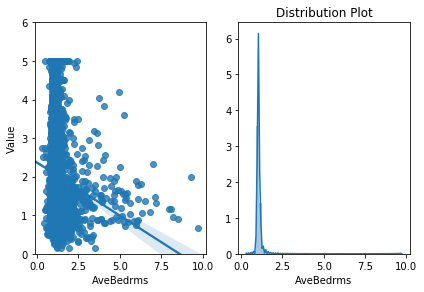

In [11]:
plt.subplot(1,2,1)
sns.regplot(data=upd_data,x="AveBedrms",y="Value")
plt.ylim(0,6)
plt.subplot(1,2,2)
sns.distplot(upd_data["AveBedrms"])
plt.tight_layout()
plt.title("Distribution Plot")
print(upd_data[["AveBedrms","Value"]].corr())
print("Skewness of AveBedrms is : ",upd_data["AveBedrms"].skew())

# Check Population

            Population     Value
Population    1.000000 -0.024693
Value        -0.024693  1.000000
Skewness of Population is :  4.939119061291943


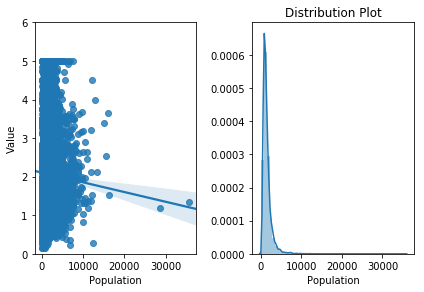

In [12]:
plt.subplot(1,2,1)
sns.regplot(data=upd_data,x="Population",y="Value")
plt.ylim(0,6)
plt.subplot(1,2,2)
sns.distplot(upd_data["Population"])
plt.tight_layout()
plt.title("Distribution Plot")
print(upd_data[["Population","Value"]].corr())
print("Skewness of Population is : ",upd_data["Population"].skew())

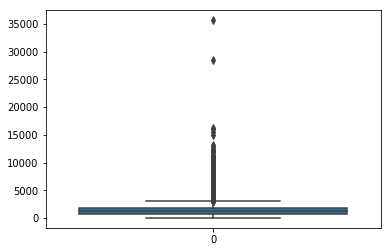

In [13]:
sns.boxplot(data=upd_data["Population"])

We have some outliers in population

Removing records with population > 20,000

In [14]:
total_records_removed += len(upd_data.loc[upd_data["Population"]>20000,:])
upd_data=upd_data.loc[upd_data["Population"]<=20000]
print("Total records removed till now = ",total_records_removed)

Total records removed till now =  13


            Population     Value
Population    1.000000 -0.023759
Value        -0.023759  1.000000
Skewness of Population is :  3.28588760695078


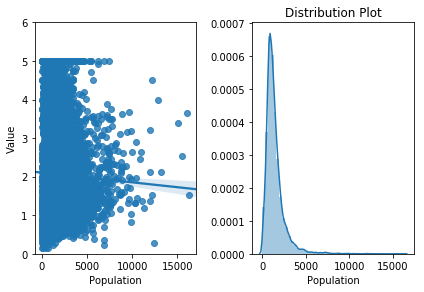

In [15]:
plt.subplot(1,2,1)
sns.regplot(data=upd_data,x="Population",y="Value")
plt.ylim(0,6)
plt.subplot(1,2,2)
sns.distplot(upd_data["Population"])
plt.tight_layout()
plt.title("Distribution Plot")
print(upd_data[["Population","Value"]].corr())
print("Skewness of Population is : ",upd_data["Population"].skew())

# Check AveOccup

          AveOccup     Value
AveOccup  1.000000 -0.023741
Value    -0.023741  1.000000
Skewness of AveOccup is :  97.61083506147749


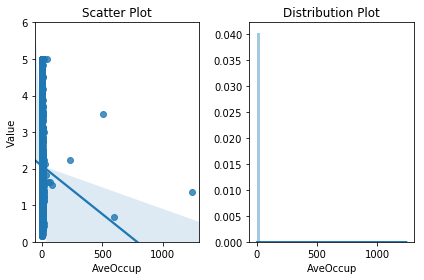

In [16]:
plt.subplot(1,2,1)
sns.regplot(data=upd_data,x="AveOccup",y="Value")
plt.ylim(0,6)
plt.xlabel("AveOccup")
plt.ylabel("Value")
plt.title("Scatter Plot")
plt.subplot(1,2,2)
sns.distplot(upd_data["AveOccup"])
plt.tight_layout()
plt.title("Distribution Plot")
print(upd_data[["AveOccup","Value"]].corr())
print("Skewness of AveOccup is : ",upd_data["AveOccup"].skew())

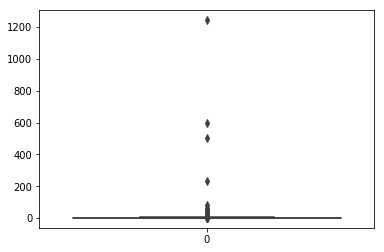

In [17]:
sns.boxplot(data=upd_data["AveOccup"])

Removing outliers from AveOccup and incrementing the total records removed counter

In [18]:
total_records_removed += len(upd_data.loc[upd_data["AveOccup"]>30,:])
upd_data=upd_data.loc[upd_data["AveOccup"]<=30,:]
print("Total records removed till now = ",total_records_removed)

Total records removed till now =  22


          AveOccup     Value
AveOccup  1.000000 -0.237126
Value    -0.237126  1.000000
Skewness of AveOccup is :  4.425386909845703


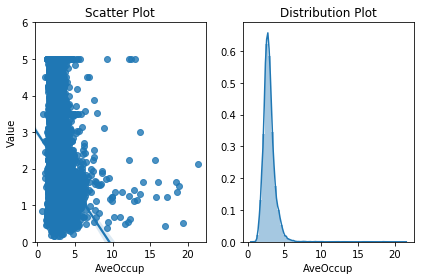

In [19]:
plt.subplot(1,2,1)
sns.regplot(data=upd_data,x="AveOccup",y="Value")
plt.ylim(0,6)
plt.xlabel("AveOccup")
plt.ylabel("Value")
plt.title("Scatter Plot")
plt.subplot(1,2,2)
sns.distplot(upd_data["AveOccup"])
plt.tight_layout()
plt.title("Distribution Plot")
print(upd_data[["AveOccup","Value"]].corr())
print("Skewness of AveOccup is : ",upd_data["AveOccup"].skew())

In [20]:
upd_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Value
count,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000
mean,3.870414,28.642836,5.394683,1.089481,1421.876079,2.933982,35.630176,-119.569637,2.068619
std,1.899398,12.583608,1.841566,0.310380,1087.553620,0.877318,2.135184,2.003810,1.153832
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.562800,18.000000,4.440000,1.006053,788.000000,2.430189,33.930000,-121.800000,1.196000
50%,3.534700,29.000000,5.227722,1.048730,1166.000000,2.818116,34.260000,-118.490000,1.797500
75%,4.742975,37.000000,6.050518,1.099406,1724.000000,3.281510,37.710000,-118.010000,2.648750
max,15.000100,52.000000,39.755906,9.703704,16305.000000,21.333333,41.950000,-114.310000,5.000010


# Corelation and HeatMap

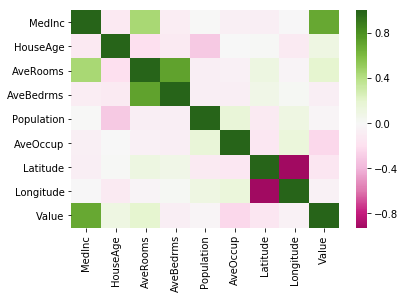

In [21]:
sns.heatmap(upd_data.corr(),center=0,cmap="PiYG")

MedInc has the highest correlation with Value. This makes sense as the higher wages will bring the prices up

# Feature Engineering

I can see that the prices seem to be higher near ocean. I have created a linear line that tries to find the cities near beach. Any Latitude Longitude that falls south of the line will be marked. beachflag 1(close to beach) vs 0 (no beach nearby) 

(-125, -114)

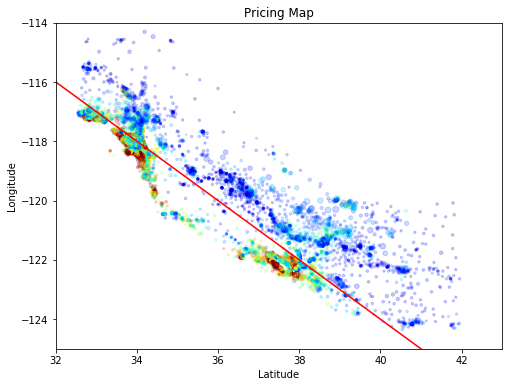

In [22]:
from matplotlib.pyplot import figure
plt.figure(figsize=(8,6))
plt.scatter(x='Latitude',y='Longitude',data=upd_data,c='Value',alpha=0.2,s="AveRooms",cmap="jet")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title('Pricing Map')
Lat=[25+x/100 for x in range(0,2500)]
Long=[-1*x-84 for x in Lat]
#y = eval('-1*x-84')
plt.plot(Lat, Long,color='red')  
plt.xlim(32,43)
plt.ylim(-125,-114)  

In [23]:
upd_data["Longcheck"]=upd_data["Latitude"]*-1-84
upd_data["BeachFlag"]=0
upd_data.loc[upd_data["Longitude"]<upd_data["Longcheck"],"BeachFlag"]=1

(-125, -114)

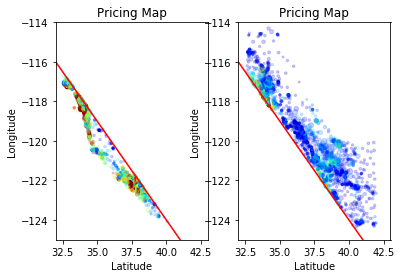

In [24]:
plt.subplot(1,2,1)
temp=upd_data.loc[upd_data["BeachFlag"]==1,:]
plt.scatter(x='Latitude',y='Longitude',data=temp,c='Value',alpha=0.2,s="AveRooms",cmap="jet")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title('Pricing Map')
Lat=[25+x/100 for x in range(0,2500)]
Long=[-1*x-84 for x in Lat]
#y = eval('-1*x-84')
plt.plot(Lat, Long,color='red')  
plt.xlim(32,43)
plt.ylim(-125,-114) 
plt.subplot(1,2,2)
temp=upd_data.loc[upd_data["BeachFlag"]==0,:]
plt.scatter(x='Latitude',y='Longitude',data=temp,c='Value',alpha=0.2,s="AveRooms",cmap="jet")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title('Pricing Map')
Lat=[25+x/100 for x in range(0,2500)]
Long=[-1*x-84 for x in Lat]
#y = eval('-1*x-84')
plt.plot(Lat, Long,color='red')  
plt.xlim(32,43)
plt.ylim(-125,-114) 

The line seems to have split the beach and non beach areas. I suspect this should help the model

In [25]:
del upd_data["Longcheck"]  # remove temp variable

In [26]:
upd_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Value,BeachFlag
count,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000
mean,3.870414,28.642836,5.394683,1.089481,1421.876079,2.933982,35.630176,-119.569637,2.068619,0.640702
std,1.899398,12.583608,1.841566,0.310380,1087.553620,0.877318,2.135184,2.003810,1.153832,0.479806
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,0.000000
25%,2.562800,18.000000,4.440000,1.006053,788.000000,2.430189,33.930000,-121.800000,1.196000,0.000000
50%,3.534700,29.000000,5.227722,1.048730,1166.000000,2.818116,34.260000,-118.490000,1.797500,1.000000
75%,4.742975,37.000000,6.050518,1.099406,1724.000000,3.281510,37.710000,-118.010000,2.648750,1.000000
max,15.000100,52.000000,39.755906,9.703704,16305.000000,21.333333,41.950000,-114.310000,5.000010,1.000000


I am creating a new feature, IncomePerOccupant - this will be the Median Income / Ave Occupant

In [27]:
upd_data["IncomePerOccupant"]=upd_data["MedInc"]/upd_data["AveOccup"]

I am creating dummy variables for AveBedrms, 
my expectation is the demand of houses may be different of different segment of homes.

In [28]:
upd_data["0-1Bed"]=0
upd_data["2-3Bed"]=0
upd_data["4-6Bed"]=0
upd_data["7-Bed"]=0
upd_data.loc[upd_data["AveBedrms"]<2,"0-1Bed"]=1
upd_data.loc[(upd_data["AveBedrms"]>=2)&(upd_data["AveBedrms"]<4),"2-3Bed"]=1
upd_data.loc[(upd_data["AveBedrms"]>=4)&(upd_data["AveBedrms"]<7),"4-6Bed"]=1
upd_data.loc[(upd_data["AveBedrms"]>=7),"7-Bed"]=1

In [29]:
upd_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Value,BeachFlag,IncomePerOccupant,0-1Bed,2-3Bed,4-6Bed,7-Bed
count,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000
mean,3.870414,28.642836,5.394683,1.089481,1421.876079,2.933982,35.630176,-119.569637,2.068619,0.640702,1.408984,0.988845,0.008439,0.002280,0.000437
std,1.899398,12.583608,1.841566,0.310380,1087.553620,0.877318,2.135184,2.003810,1.153832,0.479806,0.754715,0.105030,0.091479,0.047691,0.020889
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,0.000000,0.029060,0.000000,0.000000,0.000000,0.000000
25%,2.562800,18.000000,4.440000,1.006053,788.000000,2.430189,33.930000,-121.800000,1.196000,0.000000,0.870209,1.000000,0.000000,0.000000,0.000000
50%,3.534700,29.000000,5.227722,1.048730,1166.000000,2.818116,34.260000,-118.490000,1.797500,1.000000,1.295953,1.000000,0.000000,0.000000,0.000000
75%,4.742975,37.000000,6.050518,1.099406,1724.000000,3.281510,37.710000,-118.010000,2.648750,1.000000,1.775985,1.000000,0.000000,0.000000,0.000000
max,15.000100,52.000000,39.755906,9.703704,16305.000000,21.333333,41.950000,-114.310000,5.000010,1.000000,7.549836,1.000000,1.000000,1.000000,1.000000


Create X and Y variables

In [30]:
X=upd_data[["MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup","Latitude","Longitude", \
     "BeachFlag","0-1Bed","2-3Bed","4-6Bed","7-Bed"]]
Y=upd_data["Value"]

# Train Test Split

In [31]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.25,random_state=0)
print("Train dataset size :",len(Y_Train))
print("Test dataset size :",len(Y_Test))

Train dataset size : 15463
Test dataset size : 5155


# Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Lin_model=LinearRegression()
Lin_model.fit(X_Train,Y_Train)
print("TRAIN - Mean Sqaure Error ",mean_squared_error(Y_Train, Lin_model.predict(X_Train)))
print("TEST - Mean Sqaure Error ",mean_squared_error(Y_Test, Lin_model.predict(X_Test)))
list(zip(X.columns,Lin_model.coef_))

TRAIN - Mean Sqaure Error  0.46623632277449295
TEST - Mean Sqaure Error  0.44723611125486407


[('MedInc', 0.41377964958962127),
 ('HouseAge', 0.010243708097288777),
 ('AveRooms', -0.07337683107234734),
 ('AveBedrms', 0.8491212501936698),
 ('Population', 2.9416813328826154e-05),
 ('AveOccup', -0.24644039548856794),
 ('Latitude', -0.29742005559596735),
 ('Longitude', -0.29611895054080417),
 ('BeachFlag', 0.3115117018101874),
 ('0-1Bed', 1.3811889230110437),
 ('2-3Bed', 0.8069273029228112),
 ('4-6Bed', -0.25202298312771965),
 ('7-Bed', -1.9360932428061308)]

# Decision Tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor
tree_model=DecisionTreeRegressor()
tree_model.fit(X_Train,Y_Train)

train_mse='{0:.2f}'.format(mean_squared_error(Y_Train, tree_model.predict(X_Train)))
print("TRAIN - Mean Sqaure Error ",train_mse)
test_mse='{0:.2f}'.format(mean_squared_error(Y_Test, tree_model.predict(X_Test)))
print("TEST - Mean Sqaure Error ",test_mse)
list(zip(X.columns,tree_model.feature_importances_))

TRAIN - Mean Sqaure Error  0.00
TEST - Mean Sqaure Error  0.47


[('MedInc', 0.4748452386833133),
 ('HouseAge', 0.0451012309835506),
 ('AveRooms', 0.03072032000990501),
 ('AveBedrms', 0.025809667512614216),
 ('Population', 0.029211743469764746),
 ('AveOccup', 0.12083355943017424),
 ('Latitude', 0.068861255514957),
 ('Longitude', 0.0666152221939116),
 ('BeachFlag', 0.1374385628328262),
 ('0-1Bed', 0.0001258019996942607),
 ('2-3Bed', 4.8781933857824145e-05),
 ('4-6Bed', 0.00038861252127477447),
 ('7-Bed', 2.9141561563879455e-09)]

Decision Tree seems to have memorized the train dataset. I would call this overfitting / High variance.

Below, we try to find a parameter that will reduce variance.

In [34]:
for max_depth in [4,8,12,14,16,18]:
    tree_model=DecisionTreeRegressor(max_depth=max_depth)
    tree_model.fit(X_Train,Y_Train)
    train_mse='{0:.2f}'.format(mean_squared_error(Y_Train, tree_model.predict(X_Train)))
    test_mse='{0:.2f}'.format(mean_squared_error(Y_Test, tree_model.predict(X_Test)))
    print('-----'*10)
    print("max_depth size is ",max_depth,"\tMSE TRAIN - ",train_mse,"\tMSE TEST - ", test_mse)

--------------------------------------------------
max_depth size is  4 	MSE TRAIN -  0.48 	MSE TEST -  0.48
--------------------------------------------------
max_depth size is  8 	MSE TRAIN -  0.28 	MSE TEST -  0.37
--------------------------------------------------
max_depth size is  12 	MSE TRAIN -  0.13 	MSE TEST -  0.40
--------------------------------------------------
max_depth size is  14 	MSE TRAIN -  0.07 	MSE TEST -  0.43
--------------------------------------------------
max_depth size is  16 	MSE TRAIN -  0.04 	MSE TEST -  0.44
--------------------------------------------------
max_depth size is  18 	MSE TRAIN -  0.01 	MSE TEST -  0.46


I think the max depth of 8 is the best model that has a good tradeoff between variance and bias.
If I go any deeper, the model is overfitting.

In [35]:
tree_model=DecisionTreeRegressor(max_depth=8)
tree_model.fit(X_Train,Y_Train)
train_mse='{0:.2f}'.format(mean_squared_error(Y_Train, tree_model.predict(X_Train)))
test_mse='{0:.2f}'.format(mean_squared_error(Y_Test, tree_model.predict(X_Test)))
print("TRAIN - Mean Sqaure Error at depth(8) ",train_mse)
print("TEST - Mean Sqaure Error at depth(8) ",test_mse)

TRAIN - Mean Sqaure Error at depth(8)  0.28
TEST - Mean Sqaure Error at depth(8)  0.37


Now the decision tree is much better, the variance has reduced. However, the accuracy has also reduced.

# Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(X_Train,Y_Train)
train_mse='{0:.2f}'.format(mean_squared_error(Y_Train, rf_model.predict(X_Train)))
test_mse='{0:.2f}'.format(mean_squared_error(Y_Test, rf_model.predict(X_Test)))
print("TRAIN - Mean Sqaure Error ",train_mse)
print("TEST - Mean Sqaure Error ",test_mse)

TRAIN - Mean Sqaure Error  0.05
TEST - Mean Sqaure Error  0.26


For Random Forest, I will try to use a loop and use different values of max_depth to find the parameter with least variance and bias

In [37]:
for max_depth in [4,8,12,14,16,18]:
    rf_model=RandomForestRegressor(max_depth=max_depth)
    rf_model.fit(X_Train,Y_Train)
    train_mse='{0:.2f}'.format(mean_squared_error(Y_Train, rf_model.predict(X_Train)))
    test_mse='{0:.2f}'.format(mean_squared_error(Y_Test, rf_model.predict(X_Test)))
    print('-----'*10)
    print("max_depth size is ",max_depth,"\tMSE TRAIN - ",train_mse,"\tMSE TEST - ", test_mse)

--------------------------------------------------
max_depth size is  4 	MSE TRAIN -  0.45 	MSE TEST -  0.45
--------------------------------------------------
max_depth size is  8 	MSE TRAIN -  0.25 	MSE TEST -  0.30
--------------------------------------------------
max_depth size is  12 	MSE TRAIN -  0.12 	MSE TEST -  0.27
--------------------------------------------------
max_depth size is  14 	MSE TRAIN -  0.09 	MSE TEST -  0.26
--------------------------------------------------
max_depth size is  16 	MSE TRAIN -  0.07 	MSE TEST -  0.26
--------------------------------------------------
max_depth size is  18 	MSE TRAIN -  0.05 	MSE TEST -  0.27


I think depth 8 works best

In [38]:
rf_model=RandomForestRegressor(max_depth=8)
rf_model.fit(X_Train,Y_Train)

train_mse='{0:.2f}'.format(mean_squared_error(Y_Train, rf_model.predict(X_Train)))
print("TRAIN - Mean Sqaure Error at depth(8) ",train_mse)
test_mse='{0:.2f}'.format(mean_squared_error(Y_Test, rf_model.predict(X_Test)))
print("TEST - Mean Sqaure Error at depth(8) ",test_mse)

TRAIN - Mean Sqaure Error at depth(8)  0.24
TEST - Mean Sqaure Error at depth(8)  0.30


# Ridge Regression

In [39]:
from sklearn.linear_model import Ridge
for v_alpha in [100,20,10,1,0.1,0.01,0.001]:
    Rid_model=Ridge(alpha=v_alpha)
    Rid_model.fit(X_Train,Y_Train)
    train_mse='{0:.2f}'.format(mean_squared_error(Y_Train, Rid_model.predict(X_Train)))
    test_mse='{0:.2f}'.format(mean_squared_error(Y_Test, Rid_model.predict(X_Test)))
    print('-----'*10)
    print("alpha is ",v_alpha,"\tMSE TRAIN - ",train_mse,"\tMSE TEST - ", test_mse)

--------------------------------------------------
alpha is  100 	MSE TRAIN -  0.47 	MSE TEST -  0.45
--------------------------------------------------
alpha is  20 	MSE TRAIN -  0.47 	MSE TEST -  0.45
--------------------------------------------------
alpha is  10 	MSE TRAIN -  0.47 	MSE TEST -  0.45
--------------------------------------------------
alpha is  1 	MSE TRAIN -  0.47 	MSE TEST -  0.45
--------------------------------------------------
alpha is  0.1 	MSE TRAIN -  0.47 	MSE TEST -  0.45
--------------------------------------------------
alpha is  0.01 	MSE TRAIN -  0.47 	MSE TEST -  0.45
--------------------------------------------------
alpha is  0.001 	MSE TRAIN -  0.47 	MSE TEST -  0.45


I see the ridge regression seems to have same output regardless of the alpha value.This model has high bias but low variance

In [40]:
Rid_model=Ridge(alpha=0.01)
Rid_model.fit(X_Train,Y_Train)
train_mse='{0:.2f}'.format(mean_squared_error(Y_Train, Rid_model.predict(X_Train)))
test_mse='{0:.2f}'.format(mean_squared_error(Y_Test, Rid_model.predict(X_Test)))
print("TRAIN - Mean Sqaure Error Ridge Regression ",train_mse)
print("TEST - Mean Sqaure Error Ridge Regression ",test_mse)
dict(zip(X.columns,Rid_model.coef_))

TRAIN - Mean Sqaure Error Ridge Regression  0.47
TEST - Mean Sqaure Error Ridge Regression  0.45


{'MedInc': 0.41377695156584887,
 'HouseAge': 0.010243076817337897,
 'AveRooms': -0.0733826825870112,
 'AveBedrms': 0.8485758460938896,
 'Population': 2.9415197566941463e-05,
 'AveOccup': -0.24644610597742433,
 'Latitude': -0.2974105289178406,
 'Longitude': -0.29610955402340977,
 'BeachFlag': 0.31151228881206483,
 '0-1Bed': 1.3788486801454332,
 '2-3Bed': 0.8054089879893587,
 '4-6Bed': -0.2519583162805852,
 '7-Bed': -1.9322993518297003}

# Lasso Regression

In [41]:
from sklearn.linear_model import Lasso
for v_alpha in [10,1,0.1,0.01,0.001,0.0001,0.00001]:
    Las_model=Lasso(alpha=v_alpha)
    Las_model.fit(X_Train,Y_Train)
    train_mse='{0:.2f}'.format(mean_squared_error(Y_Train, Las_model.predict(X_Train)))
    test_mse='{0:.2f}'.format(mean_squared_error(Y_Test, Las_model.predict(X_Test)))
    print('-----'*10)
    print("alpha is ",v_alpha,"\tMSE TRAIN - ",train_mse,"\tMSE TEST - ", test_mse)

--------------------------------------------------
alpha is  10 	MSE TRAIN -  1.33 	MSE TEST -  1.32
--------------------------------------------------
alpha is  1 	MSE TRAIN -  0.95 	MSE TEST -  0.94
--------------------------------------------------
alpha is  0.1 	MSE TRAIN -  0.55 	MSE TEST -  0.54
--------------------------------------------------
alpha is  0.01 	MSE TRAIN -  0.47 	MSE TEST -  0.46
--------------------------------------------------
alpha is  0.001 	MSE TRAIN -  0.47 	MSE TEST -  0.45
--------------------------------------------------
alpha is  0.0001 	MSE TRAIN -  0.47 	MSE TEST -  0.45
--------------------------------------------------
alpha is  1e-05 	MSE TRAIN -  0.47 	MSE TEST -  0.45


I think the alpha of 0.001 is the best one to choose. This model has high bias but low variance

In [42]:
Las_model=Lasso(alpha=0.01)
Las_model.fit(X_Train,Y_Train)
train_mse='{0:.2f}'.format(mean_squared_error(Y_Train, Las_model.predict(X_Train)))
print("TRAIN - Mean Sqaure Error Lasso Regression ",train_mse)
test_mse='{0:.2f}'.format(mean_squared_error(Y_Test, Las_model.predict(X_Test)))
print("TEST - Mean Sqaure Error Lasso Regression ",test_mse)
dict(zip(X.columns,Las_model.coef_))

TRAIN - Mean Sqaure Error Lasso Regression  0.47
TEST - Mean Sqaure Error Lasso Regression  0.46


{'MedInc': 0.3715740040234,
 'HouseAge': 0.010343731784204818,
 'AveRooms': -0.0004904836772536057,
 'AveBedrms': 0.06355350387937128,
 'Population': 3.064268792037854e-05,
 'AveOccup': -0.2468317943472713,
 'Latitude': -0.2627199118933638,
 'Longitude': -0.2561582268365807,
 'BeachFlag': 0.34877810353226063,
 '0-1Bed': -0.0,
 '2-3Bed': 0.0,
 '4-6Bed': 0.0,
 '7-Bed': -0.0}

Lasso has reduced variable coefficients to 0, which it thinks are the least significant

# Scope for Improvement - 

1) Run Pricipal Component Analysis

2) Maybe one or two functions rather than duplicating the code when I am trying to find the best model

3) Use a hold-out set for validation


# Best Model
I think the Random Forest Regressor with max depth of 8 should be the best model that should work well with unseen data

TRAIN - Mean Sqaure Error at depth(8)  - 0.24

TEST - Mean Sqaure Error at depth(8)   - 0.30